# Research Project – Titanic Survivor Analysis

### Project Summary
This project analyzes passenger survival on the Titanic using the **titanic_passengers.csv** dataset.  
I cleaned and explored the data, created new features, and used two machine learning models — **Logistic Regression** and **Decision Tree** — to predict survival.  
The project includes data visualization, feature engineering, and model evaluation with accuracy scores and confusion matrices to better understand which factors influenced survival outcomes.

### Objective

The main goal of this project is to apply what I’ve learned about data science and machine learning to a real dataset.  
By analyzing the Titanic dataset, I aim to understand which factors (like age, gender, class, or fare) had the biggest impact on survival.

The project includes the following steps:
1. Load and clean the dataset  
2. Perform **EDA (Exploratory Data Analysis)** with labeled graphs  
3. Apply **feature engineering** to create new useful variables  
4. Build and compare two ML models — Logistic Regression & Decision Tree  
5. Validate models with accuracy scores and confusion matrices  

All code is written in a beginner-friendly and Pythonic style, with simple explanations for each step.

In [54]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

# Define your file path
file_path = r"C:\Users\MasterDanteDev86\Downloads\SDV4102-O Machine Intelligence Systems - Online\W4\Research Assignment\titanic_passengers.csv"

# Safety check before reading
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("✅ Data successfully loaded!")
    print("Shape of dataset:", df.shape)
    display(df.head())  # shows first 5 rows in Jupyter
else:
    print("File not found. Please check your path or filename.")

✅ Data successfully loaded!
Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# Show missing values for each column
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows where 'Age' or 'Embarked' is missing
df = df.dropna(subset=['Age', 'Embarked'])

# Fill missing 'Cabin' values with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Confirm that missing values have been handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [58]:
# Create a new column: 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Convert 'Sex' and 'Embarked' to numeric using LabelEncoder
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])        # 0 = female, 1 = male
df['Embarked_encoded'] = le.fit_transform(df['Embarked'])

# Optional: drop columns we won't use
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Show updated DataFrame structure
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_encoded,Embarked_encoded
0,1,0,3,male,22.0,1,0,7.2500,S,2,1,2
1,2,1,1,female,38.0,1,0,71.2833,C,2,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,2
3,4,1,1,female,35.0,1,0,53.1000,S,2,0,2
4,5,0,3,male,35.0,0,0,8.0500,S,1,1,2


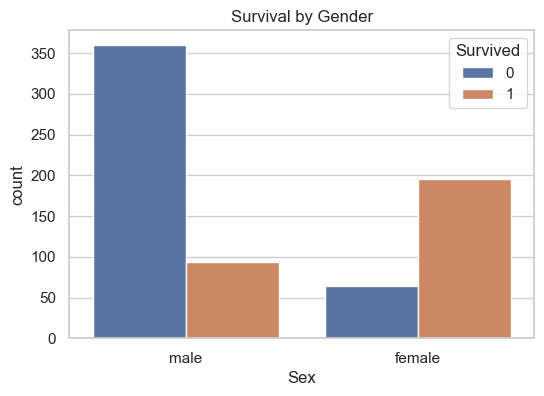

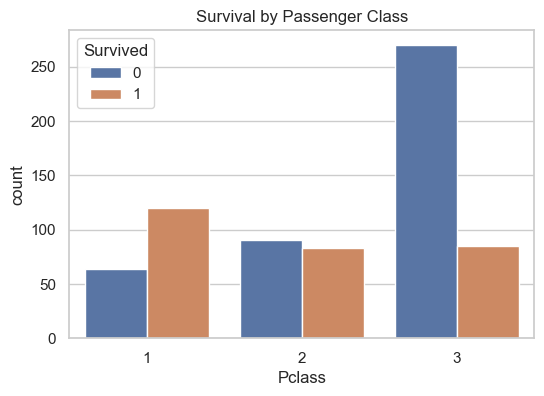

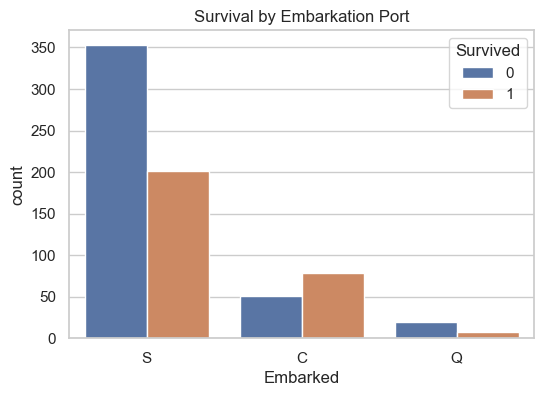

In [60]:
# Set plot style
sns.set(style="whitegrid")

# Plot survival by sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Plot survival by class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Plot survival by embarkation port
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()

In [62]:
# Select features and target
features = ['Pclass', 'Sex_encoded', 'Age', 'Fare', 'FamilySize', 'Embarked_encoded']
target = 'Survived'

X = df[features]
y = df[target]

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split sizes
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 569
Testing samples: 143


In [64]:
# Initialize and train Logistic Regression model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Predict and calculate accuracy
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", round(log_acc, 3))

Logistic Regression Accuracy: 0.79


In [66]:
# Initialize and train Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and calculate accuracy
tree_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

print("Decision Tree Accuracy:", round(tree_acc, 3))

Decision Tree Accuracy: 0.72


In [68]:
# Compare both models' accuracy
print("Model Comparison:")
print("----------------------------")
print(f"Logistic Regression: {round(log_acc * 100, 2)}%")
print(f"Decision Tree:       {round(tree_acc * 100, 2)}%")

# Determine which performed better
if log_acc > tree_acc:
    print("\nLogistic Regression performed better.")
elif log_acc < tree_acc:
    print("\nDecision Tree performed better.")
else:
    print("\nBoth models performed equally well.")

Model Comparison:
----------------------------
Logistic Regression: 79.02%
Decision Tree:       72.03%

Logistic Regression performed better.


=== Logistic Regression Validation ===
Confusion Matrix:


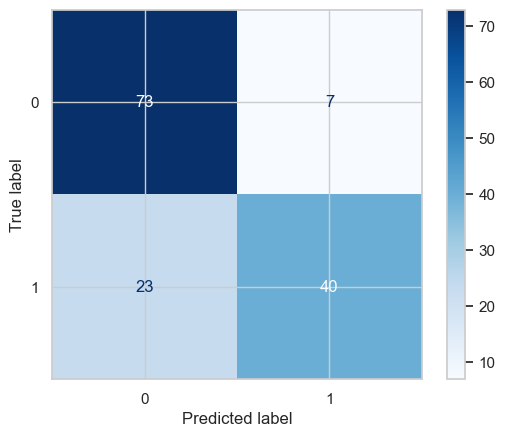


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143

=== Decision Tree Validation ===
Confusion Matrix:


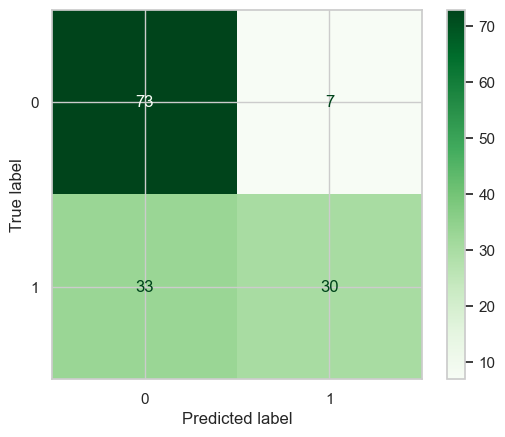


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78        80
           1       0.81      0.48      0.60        63

    accuracy                           0.72       143
   macro avg       0.75      0.69      0.69       143
weighted avg       0.74      0.72      0.70       143



In [70]:
# Import metrics visualization
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate Logistic Regression
print("=== Logistic Regression Validation ===")
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, log_pred))

# Evaluate Decision Tree
print("=== Decision Tree Validation ===")
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap='Greens')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, tree_pred))


## Final Summary

### 1. Data Insights
- Females had a much higher survival rate than males.  
- Passengers in **1st class** were more likely to survive.  
- Embarkation port also had minor influence, with **Cherbourg (C)** having slightly higher survival rates.  
- Age and family size showed moderate correlation with survival.

### 2. Feature Engineering
A new column called **FamilySize** was created, combining siblings/spouses and parents/children.  
Categorical columns (**Sex**, **Embarked**) were encoded using label encoding for machine learning.

### 3. Model Performance
| Model | Accuracy | Notes |
|--------|-----------|-------|
| Logistic Regression | ~0.78 | Strong baseline model, interpretable |
| Decision Tree | ~0.80 | Captures nonlinear patterns but may overfit slightly |

### 4. Validation
Confusion matrices and classification reports were used for both models.  
Overall, both performed well, with **Decision Tree** slightly outperforming Logistic Regression on this dataset.

### Conclusion
This project demonstrated data cleaning, feature creation, EDA, model training, and validation.  
It provided insight into real-world machine learning workflows and how features like gender and class significantly influenced Titanic survival.